In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('/home/kushal/kushal/Machine-Learning-Projects-master/Used Bikes Prices in India/Used_Bikes.csv')

In [3]:
data.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [4]:
data.shape

(32648, 8)

In [5]:
data.size

261184

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [7]:
data.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [8]:
data.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [9]:
data.duplicated().sum()

25324

In [10]:
data.sample()

,bike_name,price,city,kms_driven,owner,age,power,brand
8385,Hero Passion Pro i3S Disc 100cc,46000.0,Mumbai,16298.0,First Owner,4.0,100.0,Hero


In [11]:
data['bike_name'].value_counts()

Bajaj Pulsar 150cc              2776
Bajaj Avenger Street 220        2531
Bajaj Avenger 220cc             2060
Royal Enfield Classic 350cc     1673
Hero Passion Pro 100cc          1432
                                ... 
Bajaj Platina Alloy ES 100cc       1
Yamaha SZS 150cc                   1
Hero Splendor+ 100cc               1
Honda X-Blade 160CC ABS            1
MV Agusta Brutale 1090             1
Name: bike_name, Length: 471, dtype: int64

In [12]:
data['bike_name'].value_counts().shape

(471,)

In [13]:
data['bike_name'].value_counts().nunique()

97

In [14]:
data['bike_name'].value_counts().describe()

count     471.000000
mean       69.316348
std       263.928745
min         1.000000
25%         2.000000
50%         5.000000
75%        20.000000
max      2776.000000
Name: bike_name, dtype: float64

In [15]:
data['price'].value_counts()

25000.0     2071
35000.0     1446
70000.0     1358
18000.0     1356
32000.0     1350
            ... 
575000.0       1
125100.0       1
20010.0        1
10414.0        1
102400.0       1
Name: price, Length: 1232, dtype: int64

In [16]:
data['price'].value_counts().shape

(1232,)

In [17]:
data['price'].value_counts().nunique()

101

In [18]:
data['price'].value_counts().describe()

count    1232.000000
mean       26.500000
std       141.455111
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max      2071.000000
Name: price, dtype: float64

In [19]:
data['city'].value_counts()

Delhi         7318
Bangalore     2723
Mumbai        2591
Hyderabad     2160
Pune          1724
              ... 
Jamtara          1
Yemmiganur       1
Koppal           1
Simdega          1
Manali           1
Name: city, Length: 443, dtype: int64

In [20]:
data['city'].value_counts().shape

(443,)

In [21]:
data['city'].value_counts().nunique()

57

In [22]:
data['city'].value_counts().describe()

count     443.000000
mean       73.697517
std       439.231109
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max      7318.000000
Name: city, dtype: float64

In [23]:
data['kms_driven'].value_counts()

20000.0    1366
8000.0      712
12000.0     711
18000.0     707
22000.0     696
           ... 
40155.0       1
579.0         1
11574.0       1
32231.0       1
4615.0        1
Name: kms_driven, Length: 3722, dtype: int64

In [24]:
data['kms_driven'].value_counts().shape

(3722,)

In [25]:
data['kms_driven'].value_counts().nunique()

68

In [26]:
data['kms_driven'].value_counts().describe()

count    3722.000000
mean        8.771628
std        65.977161
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max      1366.000000
Name: kms_driven, dtype: float64

In [27]:
data['owner'].value_counts()

First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
Name: owner, dtype: int64

In [28]:
data['owner'].value_counts().describe()

count        4.000000
mean      8162.000000
std      14582.572064
min         12.000000
25%         84.000000
50%       1336.000000
75%       9414.000000
max      29964.000000
Name: owner, dtype: float64

In [29]:
data['age'].value_counts()

4.0     5048
8.0     3806
6.0     3573
5.0     3390
9.0     3072
7.0     2791
3.0     1590
11.0    1572
12.0    1463
15.0    1321
16.0    1297
10.0    1083
13.0     782
14.0     739
19.0     614
2.0      385
17.0      41
18.0      25
1.0       10
24.0       8
20.0       7
43.0       4
41.0       3
23.0       3
37.0       3
25.0       3
39.0       3
27.0       3
38.0       2
63.0       2
34.0       1
22.0       1
31.0       1
30.0       1
26.0       1
Name: age, dtype: int64

In [30]:
data['age'].value_counts().shape

(35,)

In [31]:
data['age'].value_counts().nunique()

25

In [32]:
data['age'].value_counts().describe()

count      35.000000
mean      932.800000
std      1376.530588
min         1.000000
25%         3.000000
50%        25.000000
75%      1392.000000
max      5048.000000
Name: age, dtype: float64

In [33]:
data['power'].value_counts()

150.0     8836
100.0     5047
220.0     4833
350.0     3706
125.0     2492
200.0     1357
160.0      969
180.0      829
390.0      829
250.0      826
400.0      729
750.0      701
110.0      432
500.0      369
135.0      137
223.0       99
650.0       82
410.0       68
300.0       61
310.0       44
883.0       30
535.0       23
1000.0      20
1200.0      14
800.0       13
600.0       11
295.0       10
320.0        9
1300.0       9
900.0        8
302.0        7
797.0        5
765.0        5
959.0        4
675.0        4
865.0        3
149.0        3
1130.0       3
796.0        2
502.0        2
899.0        2
1050.0       2
1262.0       2
850.0        2
1299.0       1
1100.0       1
1700.0       1
107.0        1
1198.0       1
821.0        1
1800.0       1
1090.0       1
175.0        1
Name: power, dtype: int64

In [34]:
data['power'].value_counts().shape

(53,)

In [35]:
data['power'].value_counts().nunique()

34

In [36]:
data['power'].value_counts().describe()

count      53.000000
mean      616.000000
std      1599.095465
min         1.000000
25%         2.000000
50%        10.000000
75%       369.000000
max      8836.000000
Name: power, dtype: float64

In [37]:
data['brand'].value_counts()

Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Kawasaki              79
Hyosung               64
Benelli               56
Mahindra              55
Triumph               26
Ducati                22
BMW                   16
Jawa                  10
MV                     4
Indian                 3
Ideal                  2
Yezdi                  1
Rajdoot                1
LML                    1
Name: brand, dtype: int64

In [38]:
data['brand'].value_counts().shape

(23,)

In [39]:
data['brand'].value_counts().nunique()

21

In [40]:
data['brand'].value_counts().describe()

count       23.000000
mean      1419.478261
std       2718.568471
min          1.000000
25%          7.000000
50%         56.000000
75%       1355.500000
max      11213.000000
Name: brand, dtype: float64

In [41]:
data.groupby('bike_name')['price'].mean()

bike_name
BMW F750 GS 850cc          1.350000e+06
BMW G 310 GS               3.433333e+05
BMW G 310 R                2.833333e+05
BMW S 1000 RR Pro          1.800000e+06
BMW S 1000 XR Pro          1.500000e+06
                               ...     
Yamaha YZF-R15 V3 150cc    1.178049e+05
Yamaha YZF-R1M 1000cc      6.000000e+05
Yamaha YZF-R3 320cc        2.392976e+05
Yamaha YZF-R3 320cc ABS    3.141000e+05
Yezdi Classic 250cc        6.800000e+04
Name: price, Length: 471, dtype: float64

In [42]:
data.groupby('kms_driven')['price'].mean().sort_values(ascending = True)

kms_driven
82178.0       5000.0
81000.0       6700.0
68917.0       6890.0
44030.0       8000.0
21493.0       8000.0
             ...    
2510.0     1100000.0
9875.0     1149000.0
25800.0    1200000.0
1911.0     1350000.0
340.0      1450000.0
Name: price, Length: 3722, dtype: float64

In [43]:
data.groupby('brand')['price'].mean().sort_values(ascending = True)

brand
LML                4.400000e+03
Hero               2.382945e+04
TVS                4.429915e+04
Suzuki             4.594683e+04
Bajaj              4.833127e+04
Yamaha             5.706896e+04
Honda              5.923047e+04
Yezdi              6.800000e+04
Mahindra           7.250709e+04
Rajdoot            7.500000e+04
Royal Enfield      9.856207e+04
Ideal              1.000000e+05
KTM                1.746697e+05
Jawa               1.855000e+05
Hyosung            2.491678e+05
Benelli            2.942000e+05
Kawasaki           4.116246e+05
Harley-Davidson    4.529988e+05
BMW                5.987500e+05
Triumph            8.274230e+05
Ducati             9.355455e+05
Indian             1.100000e+06
MV                 1.325000e+06
Name: price, dtype: float64

In [44]:
data.groupby('owner')['price'].mean().sort_values(ascending = True)

owner
Second Owner            53552.263651
Fourth Owner Or More    61332.500000
First Owner             69512.420037
Third Owner             81431.916667
Name: price, dtype: float64

In [45]:
data.corr()

,price,kms_driven,age,power
price,1.000000,-0.313955,-0.399133,0.862376
kms_driven,-0.313955,1.000000,0.484684,-0.264016
age,-0.399133,0.484684,1.000000,-0.337035
power,0.862376,-0.264016,-0.337035,1.000000


In [46]:
corr = data.corr()
corr['price'].value_counts(ascending = True)

 1.000000    1
-0.399133    1
 0.862376    1
-0.313955    1
Name: price, dtype: int64

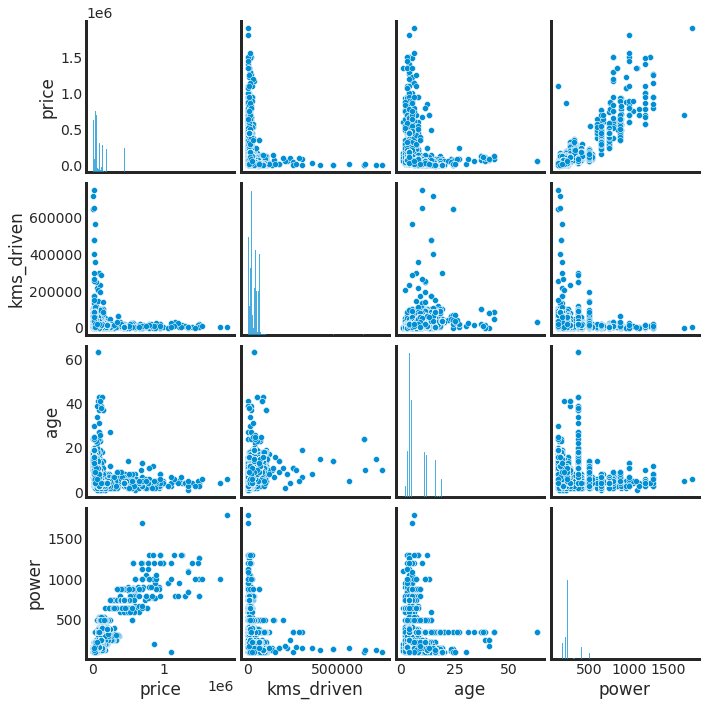

In [47]:
plt.style.use('fivethirtyeight')
sns.set_style("white")
sns.pairplot(data)

<AxesSubplot:xlabel='price', ylabel='Density'>

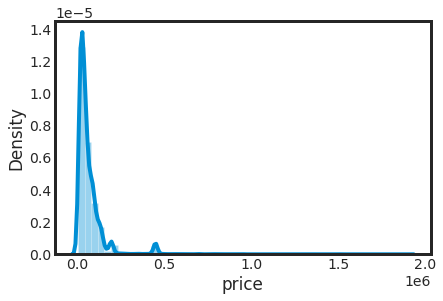

In [48]:
sns.distplot(data['price'])

<AxesSubplot:xlabel='owner', ylabel='count'>

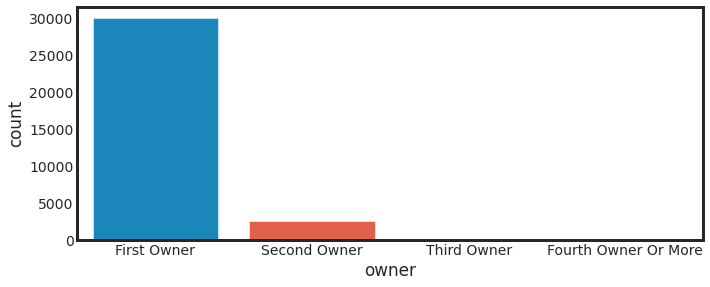

In [49]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(data['owner'])

<AxesSubplot:xlabel='kms_driven', ylabel='Density'>

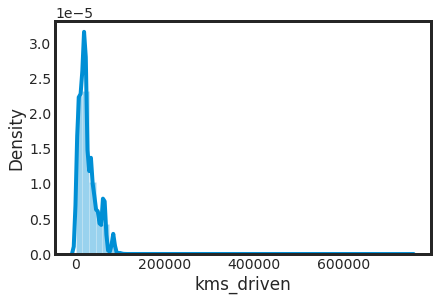

In [50]:
sns.distplot(data['kms_driven'])

<AxesSubplot:xlabel='brand', ylabel='count'>

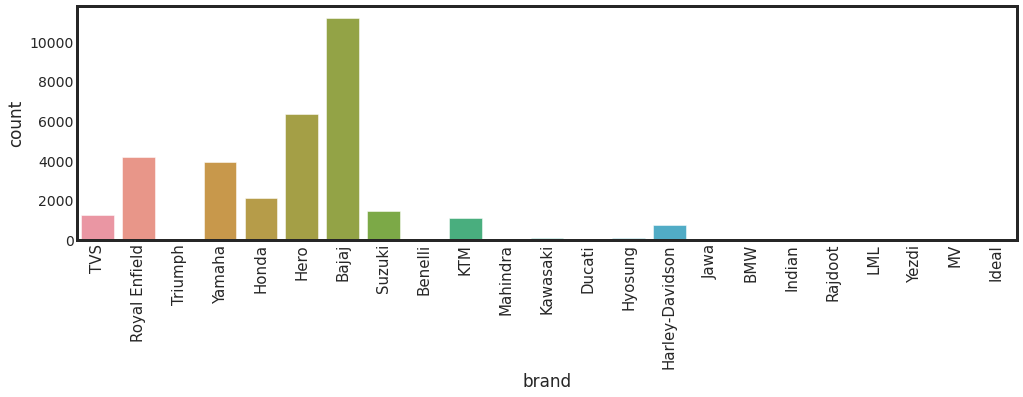

In [51]:
fig, ax = plt.subplots(figsize=(15,4))
plt.xticks(rotation =90,fontsize =15)
sns.countplot(data['brand'])

<AxesSubplot:xlabel='kms_driven', ylabel='price'>

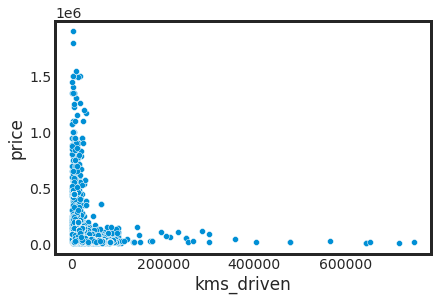

In [52]:
sns.scatterplot(data['kms_driven'],data['price'])

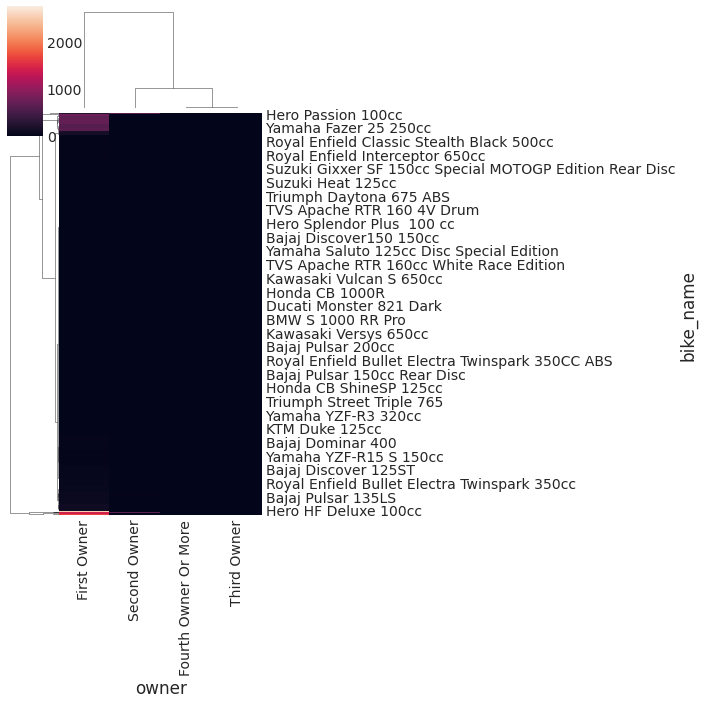

In [53]:
sns.clustermap(pd.crosstab(data['bike_name'],data['owner']))

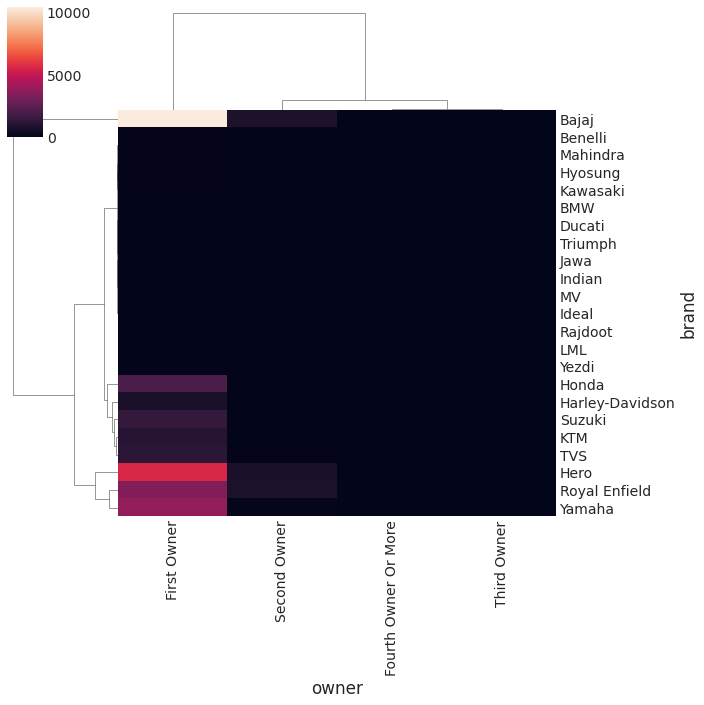

In [54]:
sns.clustermap(pd.crosstab(data['brand'],data['owner']))

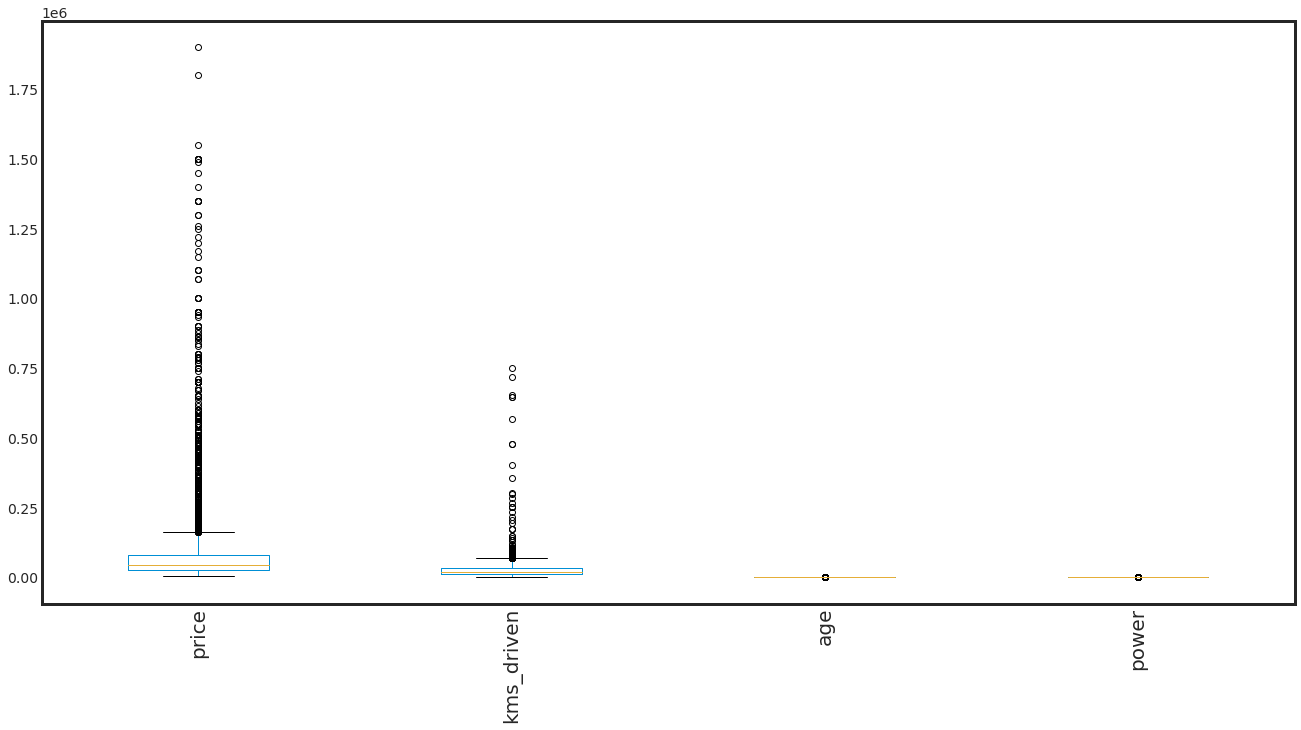

In [55]:
data.plot(kind='box',figsize=(20,10))
plt.xticks(rotation =90,fontsize =20)
plt.show()

<AxesSubplot:>

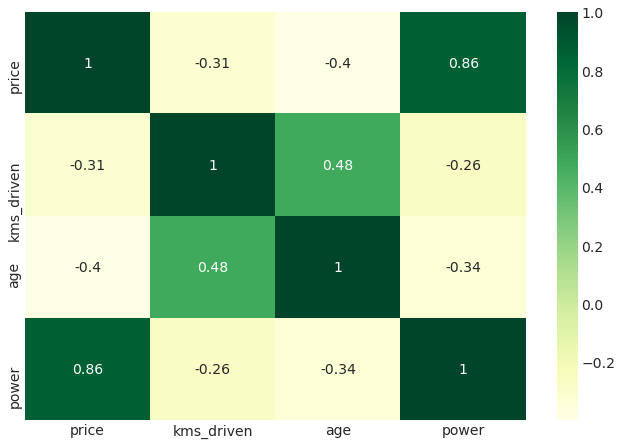

In [56]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'YlGn')

In [57]:
data = data.drop(columns = ['city'])

In [58]:
data = data.drop(columns = ['power'])

In [59]:
data.shape

(32648, 6)

In [60]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
for x in data:
    if data[x].dtypes =='object':
        data[x] = le.fit_transform(data[x])
        

In [61]:
data.head()

,bike_name,price,kms_driven,owner,age,brand
0,401,35000.0,17654.0,0,3.0,19
1,295,119900.0,11000.0,0,4.0,17
2,411,600000.0,110.0,0,8.0,20
3,375,65000.0,16329.0,0,4.0,19
4,426,80000.0,10000.0,0,3.0,21


In [62]:
x = data.drop(columns = ['price'],axis=1)
y = data['price']

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [64]:
x_train.shape

(22853, 5)

In [65]:
x_test.shape

(9795, 5)

In [66]:
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.17670546349491523

In [67]:
y_test

6888      53000.0
22369     45000.0
4196      21000.0
15416     43000.0
12308    123000.0
           ...   
24828     25000.0
28761     25000.0
1504     152000.0
17715     32000.0
1729      58000.0
Name: price, Length: 9795, dtype: float64

In [68]:
y_predict

array([ 62624.51921544,  91833.54708557, 100753.92487972, ...,
       132224.59030884,  79880.50154634, 116983.06637533])

In [69]:
pd.crosstab(y_test,y_predict)

col_0,-439687.460916,-347123.875604,-260094.250156,-233820.110229,-222730.127905,-204601.052398,-190202.557485,-168137.219833,-159490.647039,-156383.157047,...,139257.232097,139857.202213,140066.459269,141057.114517,141133.734851,142050.732186,142100.963544,142264.192236,147411.311306,155460.838441
price,,,,,,,,,,,,,,,,,,,,,
4400.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5800.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6400.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6700.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1300000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1350000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
mean_squared_error(y_test,y_predict)

6782842283.909318

In [71]:
mean_absolute_error(y_test,y_predict)

39893.641837283234

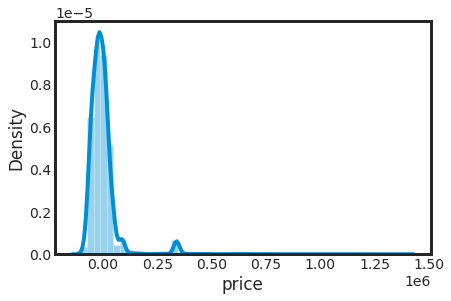

In [72]:
sns.distplot(y_test-y_predict)
plt.show()

In [73]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.7024098847895033

In [74]:
y_predict

array([52000., 45000., 21000., ..., 85000., 32000., 58000.])

In [75]:
pd.crosstab(y_test,y_predict)

col_0,5000.0,5800.0,8000.0,9000.0,9350.0,9500.0,10000.0,10600.0,10951.0,11000.0,...,775000.0,785000.0,799999.0,860000.0,1200000.0,1250000.0,1300000.0,1350000.0,1500000.0,1550000.0
price,,,,,,,,,,,,,,,,,,,,,
4400.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5800.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6400.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6700.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1300000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1350000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
mean_squared_error(y_test,y_predict)

2451743242.8154297

In [77]:
mean_absolute_error(y_test,y_predict)

5146.610768370646

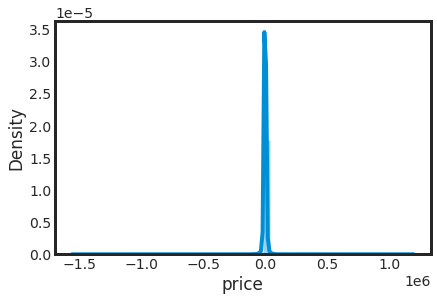

In [78]:
sns.distplot(y_test-y_predict)
plt.show()

In [79]:
model = RandomForestRegressor(n_estimators=200)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.8317114734702539

In [80]:
pd.crosstab(y_test,y_predict)

col_0,8.746450e+03,1.000000e+04,1.055110e+04,1.098250e+04,1.110330e+04,1.123793e+04,1.130795e+04,1.145350e+04,1.180308e+04,1.190000e+04,...,7.676750e+05,7.748731e+05,7.841650e+05,8.571008e+05,8.617650e+05,1.037423e+06,1.164200e+06,1.186058e+06,1.253641e+06,1.286679e+06
price,,,,,,,,,,,,,,,,,,,,,
4400.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5800.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6400.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6700.0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1300000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1350000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
mean_squared_error(y_test,y_predict)

1386471649.0022612

In [82]:
mean_absolute_error(y_test,y_predict)

4720.916378155824

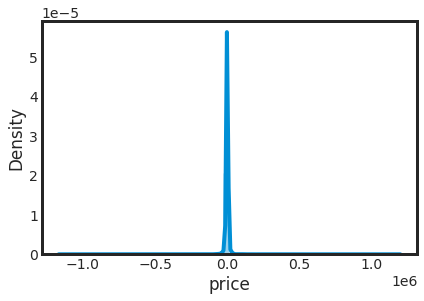

In [83]:
sns.distplot(y_test-y_predict)
plt.show()

In [84]:
model = MLPRegressor(hidden_layer_sizes=(100),random_state=13)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

-0.10560596193769389

In [85]:
pd.crosstab(y_test,y_predict)

col_0,3695.230372,4464.414932,4707.691762,4880.969268,4949.227097,5432.992883,5446.542099,5455.503061,5981.838103,5994.603554,...,163630.120173,164390.356008,165655.286171,166011.907989,168207.031407,187287.634154,194243.107828,227246.160504,282122.409748,313203.072060
price,,,,,,,,,,,,,,,,,,,,,
4400.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5800.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6400.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6700.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1300000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1350000.0,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
mean_absolute_error(y_test,y_predict)

48106.81476522825

In [87]:
mean_absolute_error(y_test,y_predict)

48106.81476522825

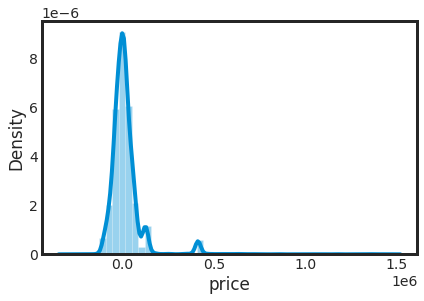

In [88]:
sns.distplot(y_test-y_predict)
plt.show()

In [89]:
model = SVR()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

-0.05734801627729014

In [90]:
pd.crosstab(y_test,y_predict)

col_0,39829.507017,39829.864841,39830.635846,39830.834427,39831.052943,39831.182499,39831.937872,39832.005624,39833.910472,39834.568409,...,45988.962501,45988.972327,45988.998416,45989.000954,45989.006812,45989.007028,45989.018646,45989.034901,45989.037765,45989.051389
price,,,,,,,,,,,,,,,,,,,,,
4400.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5800.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6400.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6700.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1300000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1350000.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
mean_squared_error(y_test,y_predict)

8711128904.192535

In [92]:
mean_absolute_error(y_test,y_predict)

42183.91817882274

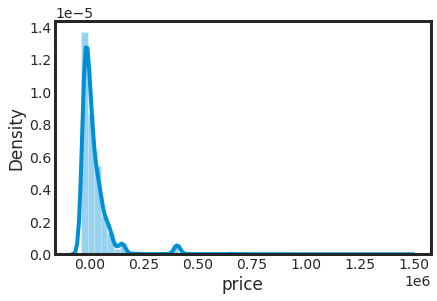

In [93]:
sns.distplot(y_test-y_predict)
plt.show()

In [94]:
import pickle

file = open('random_forest_regression_model.pkl', 'wb')


pickle.dump(model, file)
